In [1]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools.google_books import GoogleBooksQueryRun
from langchain_community.utilities.google_books import GoogleBooksAPIWrapper
from langchain_community.tools.pubmed.tool import PubmedQueryRun
from langchain_community.tools import YouTubeSearchTool


# from langchain_community.utilities.google_scholar import GoogleScholarAPIWrapper


In [2]:
from dotenv import load_dotenv
load_dotenv()
import os


os.environ["GOOGLE_BOOKS_API_KEY"] = os.getenv("GOOGLE_BOOKS_API_KEY")
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [3]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query Arxiv Paper")

print(arxiv.name)

arxiv


In [4]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
print(wiki.name)

wikipedia


In [5]:
books = GoogleBooksQueryRun(api_wrapper=GoogleBooksAPIWrapper())
print(books.name)

GoogleBooks


In [6]:
pubmed = PubmedQueryRun()
print(pubmed.name)

pub_med


In [7]:
youtube = YouTubeSearchTool()

In [8]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily=TavilySearchResults()
    


C:\Users\aksha\AppData\Local\Temp\ipykernel_50164\3209645552.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily=TavilySearchResults()


In [9]:
tools=[arxiv,wiki,tavily,books,pubmed,youtube]

In [15]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="llama-3.3-70b-versatile")
llm_with_tools=llm.bind_tools(tools=tools)

In [17]:
llm_with_tools.invoke("ofdm research paper")

AuthenticationError: Error code: 401 - {'error': {'message': 'Invalid API Key', 'type': 'invalid_request_error', 'code': 'invalid_api_key'}}

In [18]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated 
from langgraph.graph.message import add_messages


In [19]:
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]
    


In [20]:
from IPython.display import Image,display
from langgraph.graph import StateGraph, START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


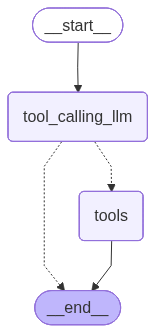

In [21]:
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

##edges

builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition,
)

builder.add_edge("tools",END)

graph=builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
messages = graph.invoke({"messages":"hey , provide me the latest cricket winner and provide the paper on ofdm"})
for m in messages["messages"]:
    m.pretty_print()

AuthenticationError: Error code: 401 - {'error': {'message': 'Invalid API Key', 'type': 'invalid_request_error', 'code': 'invalid_api_key'}}